# Maskin Læring: Klassifisering av dyr

## Trening av vårt første CNN!
![l](https://www.managers.org.uk/wp-content/uploads/2020/03/BrainTraining.jpg)  
I denne notebooken kommer vi til å gjøre et par ting: 
1. Skrive inn studentnummeret vårt
2. Generere et nevralt nettverk(tenk en hjerne) med dette studentnummeret. 
3. Trene dette nettverket

Først så setter vi inn student nummeret vårt.

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

### La oss nå gå inn på kaggle, hente ut api nøkkelen  vår, og legge den inn under.
### Dette gjør sånn at vi kan bruke datasettet som finnes på kaggle.

In [1]:
kaggle_user= "uzaaft"
kaggle_api = "eef66e4e79f6db8c868a369edc57500c"
os.environ["KAGGLE_USERNAME"] = kaggle_user
os.environ["KAGGLE_KEY"] = kaggle_api
!pip install kaggle
!kaggle datasets download -d alessiocorrado99/animals10

Defaulting to user installation because normal site-packages is not writeable
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip -q animals10.zip 

In [25]:
import random
Student_nr = input("Hva er student nummeret ditt?")

random.seed(Student_nr)

activation_layers = [
            "relu",
            "sigmoid",
            "softmax",
            "softplus",
            "softsign",
            "tanh",
            "selu",
            "elu",
            "exponential",
]
n = random.randint(1, len(activation_layers))
layer = activation_layers[n]
lr = random.uniform(1e-4, 1e-1)
print(f"Your learning rate is: {lr}")
print(f"Your activation layer is: {layer}")

Hva er student nummeret ditt? 100000000000


Your learning rate is: 0.002604484202129305
Your activation layer is: softplus


In [5]:
base_dir = './raw-img'
LABELS = os.listdir(base_dir)
LABELS.sort()
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant",
                 "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
                 "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel",
                 "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
                 "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto",
                 "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
LABELS_english = list(translate.values())
base_dir + '/' + LABELS[0]
dataset=[]
testset=[]
count=0

for label in LABELS:
    i=0
#     path = base_dir + '/' + label
    path = os.path.join(base_dir, label)
#     print(path)
    for img in os.listdir(path):
#         print(img)
        image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(75,75))
        image=img_to_array(image)
        image=image/255.0
        if i<1000:
            dataset.append([image,count])
            i+=1
        else:
            testset.append([image,count])
    count=count+1

X,y =zip(*dataset)
test, test_labels=zip(*testset)
y = to_categorical(y)
y=np.array(y)
X=np.array(X)
print("Train Shape:{}\nTrain Labels shape: {}".format(X.shape,y.shape))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode="nearest"
)

Train Shape:(10000, 75, 75, 3)
Train Labels shape: (10000, 10)


In [6]:
def predict_image(image):
    image=img_to_array(image)/255 
    prediction_image=np.array(image)
    prediction_image= np.expand_dims(image, axis=0)
    
    pred = model.predict(prediction_image)
    value = np.argmax(pred)
    print("Prediction : ", LABELS_english[value])

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=layer, input_shape=(75, 75, 3), padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(3))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation=layer))
model.add(tf.keras.layers.Dense(32, activation=layer))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
             metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0

2021-09-23 11:09:53.142053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 11:09:53.146981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 11:09:53.147417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 11:09:53.148057: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### I cellen ovenfor lager vi modellen. Vi prøver å gjette hvilket dyr det er på bildene med denne ulærte modellen

2021-09-23 11:09:53.647366: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-23 11:09:53.977513: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-09-23 11:09:54.140252: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-09-23 11:09:54.140634: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-09-23 11:09:54.140646: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2021-09-23 11:09:54.141014: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-09-23 11:09:54.141034: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx co

Prediction :  cow


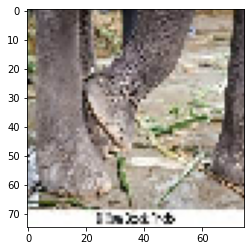

Prediction :  cow


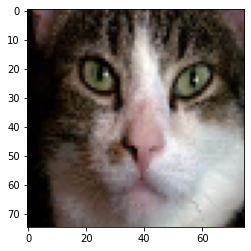

Prediction :  cow


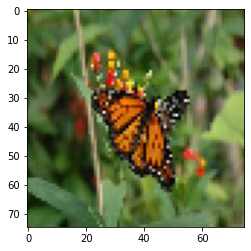

In [8]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [10]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=25
)

Epoch 1/25
63/63 [==============================] - 6s 87ms/step - loss: 2.3507 - acc: 0.1157 - val_loss: 10.7359 - val_acc: 0.1125
Epoch 2/25
63/63 [==============================] - 5s 83ms/step - loss: 2.2497 - acc: 0.1494 - val_loss: 5.2708 - val_acc: 0.0980
Epoch 3/25
63/63 [==============================] - 5s 80ms/step - loss: 2.2009 - acc: 0.1793 - val_loss: 2.8622 - val_acc: 0.0950
Epoch 4/25
63/63 [==============================] - 5s 82ms/step - loss: 2.1646 - acc: 0.1929 - val_loss: 23.1058 - val_acc: 0.1015
Epoch 5/25
63/63 [==============================] - 5s 81ms/step - loss: 2.1181 - acc: 0.2153 - val_loss: 6.0057 - val_acc: 0.1015
Epoch 6/25
63/63 [==============================] - 5s 81ms/step - loss: 2.1101 - acc: 0.2245 - val_loss: 3.1055 - val_acc: 0.1480
Epoch 7/25
63/63 [==============================] - 5s 83ms/step - loss: 2.0785 - acc: 0.2341 - val_loss: 3.8056 - val_acc: 0.1145
Epoch 8/25
63/63 [==============================] - 5s 83ms/step - loss: 2.0402 -

### La oss se hvor bra modellen vår gjetter

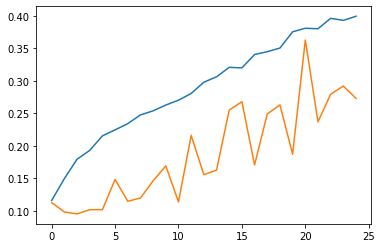

In [11]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")
plt.legend()
plt.show()

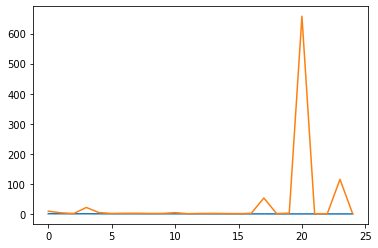

In [12]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.legend()
plt.show()

Prediction :  cane


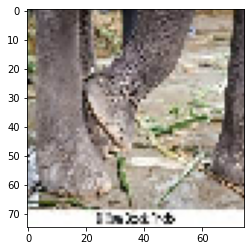

Prediction :  cat


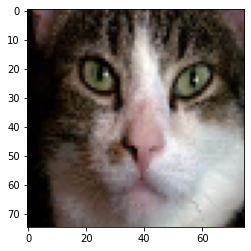

Prediction :  butterfly


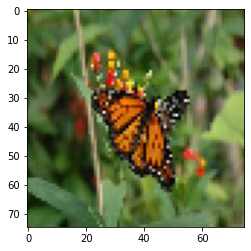

In [13]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [14]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=150, 
    initial_epoch = 25
)

Epoch 26/150
63/63 [==============================] - 5s 83ms/step - loss: 1.6572 - acc: 0.4054 - val_loss: 2.3987 - val_acc: 0.3070
Epoch 27/150
63/63 [==============================] - 5s 83ms/step - loss: 1.6524 - acc: 0.4123 - val_loss: 1.8186 - val_acc: 0.3960
Epoch 28/150
63/63 [==============================] - 5s 82ms/step - loss: 1.6215 - acc: 0.4254 - val_loss: 3.0679 - val_acc: 0.2345
Epoch 29/150
63/63 [==============================] - 5s 83ms/step - loss: 1.6128 - acc: 0.4333 - val_loss: 2.5030 - val_acc: 0.2905
Epoch 30/150
63/63 [==============================] - 5s 84ms/step - loss: 1.5992 - acc: 0.4293 - val_loss: 2.9393 - val_acc: 0.2630
Epoch 31/150
63/63 [==============================] - 5s 82ms/step - loss: 1.5815 - acc: 0.4349 - val_loss: 2.2780 - val_acc: 0.3120
Epoch 32/150
63/63 [==============================] - 5s 84ms/step - loss: 1.5655 - acc: 0.4397 - val_loss: 2.2169 - val_acc: 0.3285
Epoch 33/150
63/63 [==============================] - 5s 81ms/step - 

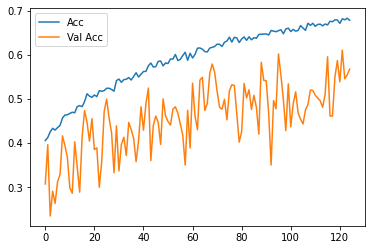

In [20]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")
plt.legend()
plt.show()

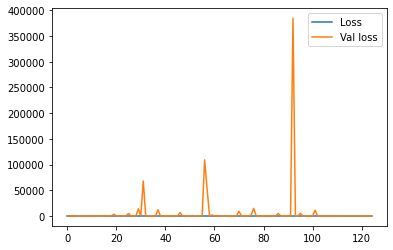

In [21]:
plt.plot(history.history['loss'],  label = "Loss")
plt.plot(history.history['val_loss'],  label = "Val loss")
plt.legend()
plt.show()

Prediction :  elephant


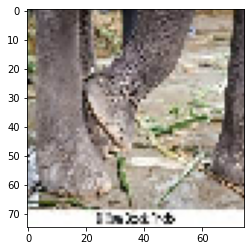

Prediction :  cat


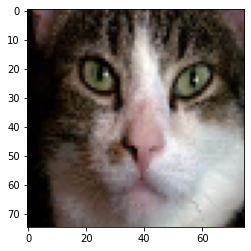

Prediction :  butterfly


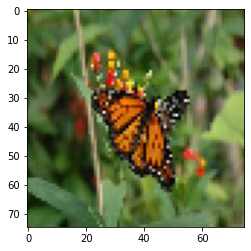

In [17]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()